# Princle Component Analysis


題材: 参考書（東京大学のデータサイエンス育成講座）の9章

In [39]:
# 必要パッケージのインポートと不思議なおまじない

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import sklearn as sl
import pandas as pd
import seaborn as sns

%matplotlib inline

## 人工データで試す

### データ作成

In [33]:
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
print('head:', X[:10])
print('mean:', X.mean(axis=0))
print('var:', X.var(axis=0))

head: [[-0.71145926 -1.03581058]
 [-0.42131274 -1.14876749]
 [-0.57035856 -1.26207862]
 [ 0.05172784 -0.12411592]
 [ 0.38326188  0.5852725 ]
 [-0.31555975 -0.73055933]
 [ 0.33253753  1.06147502]
 [ 0.78454864  0.47017237]
 [ 0.09254449  0.05471621]
 [ 0.86733882  0.69659102]]
mean: [0.03041437 0.02291652]
var: [0.21721902 0.45353628]


In [40]:
from sklearn.preprocessing import StandardScaler
sc = sl.preprocessing.StandardScaler()
X_std = sc.fit_transform(X)
print('head:', X_std[:10])
print('mean:', X_std.mean(axis=0))
print('var:', X_std.var(axis=0))

head: [[-1.59177256 -1.5720922 ]
 [-0.96923086 -1.73982067]
 [-1.28902527 -1.90807511]
 [ 0.04573042 -0.21832686]
 [ 0.75707364  0.83503619]
 [-0.74232603 -1.11882798]
 [ 0.6482389   1.54214406]
 [ 1.61807911  0.66412528]
 [ 0.1333071   0.04721901]
 [ 1.79571468  1.00033184]]
mean: [2.22044605e-18 2.22044605e-17]
var: [1. 1.]


### データ確認

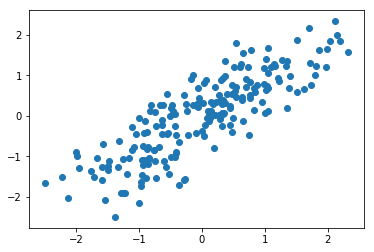

In [35]:
plt.scatter(X_std[:, 0], X_std[:, 1])

In [37]:
print('相関係数:', sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0])

相関係数: 0.8394521890125743


### 主成分分析

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
print('固有ベクトル:', pca.components_)
print('固有値（＝各主成分の分散）:', pca.explained_variance_)
print('寄与率:', pca.explained_variance_ratio_)

固有ベクトル: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
固有値（＝各主成分の分散）: [1.84869567 0.16135458]
寄与率: [0.91972609 0.08027391]


### 可視化

(-2.7437143780282294,
 2.5686713979664018,
 -2.7622504420544005,
 2.5985605312226845)

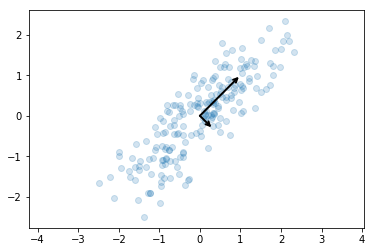

In [63]:
arrowprops = {'arrowstyle': '->', 'linewidth': 2, 'shrinkA': 0, 'shrinkB': 0}
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

for eigen_value, eigen_vector in zip(pca.explained_variance_, pca.components_):
    v = eigen_vector * np.sqrt(eigen_value)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')